<a href="https://colab.research.google.com/github/analouvain/BI-Master-RN/blob/main/mnist_convnet_AnaPaula.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Trabalho de Redes Neurais - Mnist**

**BI Master - Puc-Rio**

**Aluna:** Ana Paula Costa Assumpção

**Turma:** 2022.1

**Matrícula:** 221100813


---




## **Objetivo:**
Estudar o conceito de Transfer Learning e analisar o processo de treinamento de uma rede pré treinada da biblioteca Keras sob o conjunto de dados Mnist para realizar a tarefa de classificação de imagens de dígitos manuscritos. A análise foi realizada utilizando os otimizadores Adam e Sgd, bem como alteração o tamanho do batch size e configuração de drop out.

## **Transfer Learning em imagens:**

Transfer Learning é uma técnica de Deep Learning que por sua vez é uma técnica de machine learning.

Uma rede convolucional pode demorar muitos dias ou semanas para ser treinada e sendo necessário o uso de GPUs, que tornam o treinamento dessas redes muito custoso.

A técnica de Transfer Learning em imagens consiste na utilização de redes convolucionais pré treinadas em um grande conjunto de dados, onde é possível  adicionar camadas extras e treinar apenas essas camadas, enquanto mantém os pesos das camadas iniciais do modelo pré-treinado.

A biblioteca Keras oferece vários modelos de redes pré treinadas para classificação de imagens, como por exemplo o modelo Mnist, utilizado nesse trabalho.


## Setup

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import pandas as pd

## Prepare the data

In [ ]:
# Model / data parameters
num_classes = 10

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


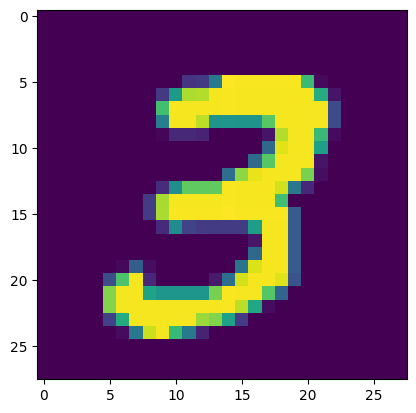

In [ ]:

    #access first image
first_image = x_train[7]

first_image = np.array(first_image)
pixels = first_image.reshape((28, 28))
plt.imshow(pixels)

Função Auxiliar para criação do modelo

In [ ]:
def create_model(optimizer="adam", dropout=0.1):
  input_shape = (28, 28, 1)

  model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(dropout),
        layers.Dense(num_classes, activation="softmax"),
    ]
  )
  model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

  return model



In [ ]:
#Criando um dataFrame para armazenar os resultados para comparação

columns = ['Optimizer', 'Epochs', 'Batch Size', 'Drop Out', 'Test loss', 'Test accuracy', 'History']

df_results = pd.DataFrame(columns=columns)

# **SGD**


---

## **Drop Out 0.5 - Batch Size 128 (MODELO INICIAL)**



### Train the model

In [ ]:
optimizer="sgd"
dropout=0.5
batch_size = 128
epochs = 15

model = create_model(optimizer=optimizer, dropout=dropout)

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 4s 8ms/step - loss: 1.6818 - accuracy: 0.4545 - val_loss: 0.5856 - val_accuracy: 0.8712
Epoch 2/15
422/422 [==============================] - 3s 7ms/step - loss: 0.6320 - accuracy: 0.8019 - val_loss: 0.2903 - val_accuracy: 0.9278
Epoch 3/15
422/422 [==============================] - 4s 9ms/step - loss: 0.4088 - accuracy: 0.8764 - val_loss: 0.2088 - val_accuracy: 0.9455
Epoch 4/15
422/422 [==============================] - 3s 7ms/step - loss: 0.3165 - accuracy: 0.9046 - val_loss: 0.1679 - val_accuracy: 0.9563
Epoch 5/15
422/422 [==============================] - 3s 6ms/step - loss: 0.2687 - accuracy: 0.9193 - val_loss: 0.1449 - val_accuracy: 0.9643
Epoch 6/15
422/422 [==============================] - 3s 7ms/step - loss: 0.2376 - accuracy: 0.9279 - val_loss: 0.1319 - val_accuracy: 0.9662
Epoch 7/15
422/422 [==============================] - 4s 9ms/step - loss: 0.2153 - accuracy: 0.9367 - val_loss: 0.1199 - val_accuracy: 0.9688
Epoch 

### Evaluate the trained model

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.0857277661561966
Test accuracy: 0.9740999937057495


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
new_record = pd.DataFrame([{'Optimizer': optimizer,
                            'Epochs': epochs,
                            'Batch Size': batch_size,
                            'Drop Out': dropout,
                            'Test loss':score[0],
                            'Test accuracy':score[1],
                            'History':history.history}])

df_results = pd.concat([df_results, new_record], ignore_index=True)


In [ ]:
df_results

,Optimizer,Epochs,Batch Size,Drop Out,Test loss,Test accuracy,History
0,sgd,15,128,0.5,0.085728,0.9741,"{'loss': [1.681801199913025, 0.631978571414947..."


## **Drop Out 0.5 - Batch Size para 256**
Modificando o Batch Size para 256 e mantendo o Drop Out em 0.5


### Train the model

In [ ]:
optimizer="sgd"
dropout=0.5
batch_size = 256
epochs = 15

model = create_model(optimizer=optimizer, dropout=dropout)

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
211/211 [==============================] - 3s 10ms/step - loss: 2.0426 - accuracy: 0.3397 - val_loss: 1.3584 - val_accuracy: 0.7822
Epoch 2/15
211/211 [==============================] - 2s 8ms/step - loss: 1.0068 - accuracy: 0.6848 - val_loss: 0.4789 - val_accuracy: 0.8897
Epoch 3/15
211/211 [==============================] - 2s 8ms/step - loss: 0.6228 - accuracy: 0.8038 - val_loss: 0.3299 - val_accuracy: 0.9180
Epoch 4/15
211/211 [==============================] - 2s 9ms/step - loss: 0.4900 - accuracy: 0.8483 - val_loss: 0.2666 - val_accuracy: 0.9305
Epoch 5/15
211/211 [==============================] - 2s 9ms/step - loss: 0.4060 - accuracy: 0.8768 - val_loss: 0.2286 - val_accuracy: 0.9400
Epoch 6/15
211/211 [==============================] - 2s 8ms/step - loss: 0.3552 - accuracy: 0.8924 - val_loss: 0.2011 - val_accuracy: 0.9452
Epoch 7/15
211/211 [==============================] - 2s 8ms/step - loss: 0.3200 - accuracy: 0.9028 - val_loss: 0.1831 - val_accuracy: 0.9515
Epoch

### Evaluate the trained model

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.1278918832540512
Test accuracy: 0.9632999897003174


In [ ]:
new_record = pd.DataFrame([{'Optimizer': optimizer,
                            'Epochs': epochs,
                            'Batch Size': batch_size,
                            'Drop Out': dropout,
                            'Test loss':score[0],
                            'Test accuracy':score[1],
                            'History':history.history}])

df_results = pd.concat([df_results, new_record], ignore_index=True)

In [ ]:
df_results

,Optimizer,Epochs,Batch Size,Drop Out,Test loss,Test accuracy,History
0,sgd,15,128,0.5,0.085728,0.9741,"{'loss': [1.681801199913025, 0.631978571414947..."
1,sgd,15,256,0.5,0.127892,0.9633,"{'loss': [2.0426106452941895, 1.00683999061584..."


## **Drop Out para 0.2 - Batch Size 128**

Modificando o Drop Out para 0.2, voltando o Batch Size para 128


### Train the model

In [ ]:
optimizer="sgd"
dropout=0.2
batch_size = 128
epochs = 15

model = create_model(optimizer=optimizer, dropout=dropout)

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 5s 9ms/step - loss: 1.4950 - accuracy: 0.5524 - val_loss: 0.4670 - val_accuracy: 0.8817
Epoch 2/15
422/422 [==============================] - 4s 8ms/step - loss: 0.4891 - accuracy: 0.8484 - val_loss: 0.2613 - val_accuracy: 0.9295
Epoch 3/15
422/422 [==============================] - 3s 6ms/step - loss: 0.3449 - accuracy: 0.8954 - val_loss: 0.2015 - val_accuracy: 0.9437
Epoch 4/15
422/422 [==============================] - 3s 7ms/step - loss: 0.2727 - accuracy: 0.9193 - val_loss: 0.1670 - val_accuracy: 0.9553
Epoch 5/15
422/422 [==============================] - 3s 8ms/step - loss: 0.2296 - accuracy: 0.9313 - val_loss: 0.1464 - val_accuracy: 0.9618
Epoch 6/15
422/422 [==============================] - 3s 8ms/step - loss: 0.1988 - accuracy: 0.9411 - val_loss: 0.1283 - val_accuracy: 0.9672
Epoch 7/15
422/422 [==============================] - 3s 7ms/step - loss: 0.1772 - accuracy: 0.9466 - val_loss: 0.1194 - val_accuracy: 0.9677
Epoch 

### Evaluate the trained model

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.07926466315984726
Test accuracy: 0.9761000275611877


In [ ]:
new_record = pd.DataFrame([{'Optimizer': optimizer,
                            'Epochs': epochs,
                            'Batch Size': batch_size,
                            'Drop Out': dropout,
                            'Test loss':score[0],
                            'Test accuracy':score[1],
                            'History':history.history}])

df_results = pd.concat([df_results, new_record], ignore_index=True)

In [ ]:
df_results

,Optimizer,Epochs,Batch Size,Drop Out,Test loss,Test accuracy,History
0,sgd,15,128,0.5,0.085728,0.9741,"{'loss': [1.681801199913025, 0.631978571414947..."
1,sgd,15,256,0.5,0.127892,0.9633,"{'loss': [2.0426106452941895, 1.00683999061584..."
2,sgd,15,128,0.2,0.079265,0.9761,"{'loss': [1.4949930906295776, 0.48913273215293..."


## **Drop Out para 0.2 - Batch Size 256**

Drop Out para 0.2, modificando o Batch Size para 256


### Train the model

In [ ]:
optimizer="sgd"
dropout=0.2
batch_size = 256
epochs = 15

model = create_model(optimizer=optimizer, dropout=dropout)

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
211/211 [==============================] - 3s 10ms/step - loss: 2.1342 - accuracy: 0.3692 - val_loss: 1.6683 - val_accuracy: 0.7593
Epoch 2/15
211/211 [==============================] - 2s 8ms/step - loss: 0.9748 - accuracy: 0.7493 - val_loss: 0.4491 - val_accuracy: 0.8925
Epoch 3/15
211/211 [==============================] - 2s 9ms/step - loss: 0.5197 - accuracy: 0.8440 - val_loss: 0.3034 - val_accuracy: 0.9202
Epoch 4/15
211/211 [==============================] - 2s 8ms/step - loss: 0.4127 - accuracy: 0.8767 - val_loss: 0.2536 - val_accuracy: 0.9303
Epoch 5/15
211/211 [==============================] - 2s 8ms/step - loss: 0.3505 - accuracy: 0.8949 - val_loss: 0.2162 - val_accuracy: 0.9403
Epoch 6/15
211/211 [==============================] - 2s 8ms/step - loss: 0.3067 - accuracy: 0.9081 - val_loss: 0.1936 - val_accuracy: 0.9482
Epoch 7/15
211/211 [==============================] - 2s 8ms/step - loss: 0.2752 - accuracy: 0.9171 - val_loss: 0.1770 - val_accuracy: 0.9510
Epoch

### Evaluate the trained model

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.12013083696365356
Test accuracy: 0.9656000137329102


In [ ]:
new_record = pd.DataFrame([{'Optimizer': optimizer,
                            'Epochs': epochs,
                            'Batch Size': batch_size,
                            'Drop Out': dropout,
                            'Test loss':score[0],
                            'Test accuracy':score[1],
                            'History':history.history}])

df_results = pd.concat([df_results, new_record], ignore_index=True)

In [ ]:
df_results

,Optimizer,Epochs,Batch Size,Drop Out,Test loss,Test accuracy,History
0,sgd,15,128,0.5,0.085728,0.9741,"{'loss': [1.681801199913025, 0.631978571414947..."
1,sgd,15,256,0.5,0.127892,0.9633,"{'loss': [2.0426106452941895, 1.00683999061584..."
2,sgd,15,128,0.2,0.079265,0.9761,"{'loss': [1.4949930906295776, 0.48913273215293..."
3,sgd,15,256,0.2,0.120131,0.9656,"{'loss': [2.1341707706451416, 0.97481960058212..."


# **ADAM**


---

## **Drop Out 0.5 - Batch Size 128**

### Train the model

In [ ]:
optimizer="adam"
dropout=0.5
batch_size = 128
epochs = 15

model = create_model(optimizer=optimizer, dropout=dropout)

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 4s 7ms/step - loss: 0.3683 - accuracy: 0.8885 - val_loss: 0.0826 - val_accuracy: 0.9762
Epoch 2/15
422/422 [==============================] - 3s 7ms/step - loss: 0.1076 - accuracy: 0.9675 - val_loss: 0.0578 - val_accuracy: 0.9830
Epoch 3/15
422/422 [==============================] - 4s 9ms/step - loss: 0.0797 - accuracy: 0.9754 - val_loss: 0.0460 - val_accuracy: 0.9868
Epoch 4/15
422/422 [==============================] - 3s 7ms/step - loss: 0.0693 - accuracy: 0.9790 - val_loss: 0.0422 - val_accuracy: 0.9888
Epoch 5/15
422/422 [==============================] - 3s 7ms/step - loss: 0.0592 - accuracy: 0.9815 - val_loss: 0.0398 - val_accuracy: 0.9895
Epoch 6/15
422/422 [==============================] - 3s 6ms/step - loss: 0.0527 - accuracy: 0.9834 - val_loss: 0.0377 - val_accuracy: 0.9893
Epoch 7/15
422/422 [==============================] - 4s 9ms/step - loss: 0.0499 - accuracy: 0.9848 - val_loss: 0.0355 - val_accuracy: 0.9903
Epoch 

### Evaluate the trained model

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.024993782863020897
Test accuracy: 0.9925000071525574


In [ ]:

new_record = pd.DataFrame([{'Optimizer': optimizer,
                            'Epochs': epochs,
                            'Batch Size': batch_size,
                            'Drop Out': dropout,
                            'Test loss':score[0],
                            'Test accuracy':score[1],
                            'History':history.history}])

df_results = pd.concat([df_results, new_record], ignore_index=True)

In [ ]:
df_results

,Optimizer,Epochs,Batch Size,Drop Out,Test loss,Test accuracy,History
0,sgd,15,128,0.5,0.085728,0.9741,"{'loss': [1.681801199913025, 0.631978571414947..."
1,sgd,15,256,0.5,0.127892,0.9633,"{'loss': [2.0426106452941895, 1.00683999061584..."
2,sgd,15,128,0.2,0.079265,0.9761,"{'loss': [1.4949930906295776, 0.48913273215293..."
3,sgd,15,256,0.2,0.120131,0.9656,"{'loss': [2.1341707706451416, 0.97481960058212..."
4,adam,15,128,0.5,0.024994,0.9925,"{'loss': [0.36827951669692993, 0.1076199188828..."


## **Drop Out 0.5 - Batch Size para 256**
Modificando o Batch Size para 256 e mantendo o Drop Out em 0.5


### Train the model

In [ ]:
optimizer="adam"
dropout=0.5
batch_size = 256
epochs = 15

model = create_model(optimizer=optimizer, dropout=dropout)

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
211/211 [==============================] - 3s 10ms/step - loss: 0.5064 - accuracy: 0.8460 - val_loss: 0.1101 - val_accuracy: 0.9683
Epoch 2/15
211/211 [==============================] - 2s 8ms/step - loss: 0.1378 - accuracy: 0.9578 - val_loss: 0.0704 - val_accuracy: 0.9798
Epoch 3/15
211/211 [==============================] - 2s 8ms/step - loss: 0.1028 - accuracy: 0.9682 - val_loss: 0.0564 - val_accuracy: 0.9847
Epoch 4/15
211/211 [==============================] - 2s 10ms/step - loss: 0.0832 - accuracy: 0.9743 - val_loss: 0.0497 - val_accuracy: 0.9867
Epoch 5/15
211/211 [==============================] - 2s 9ms/step - loss: 0.0717 - accuracy: 0.9782 - val_loss: 0.0436 - val_accuracy: 0.9875
Epoch 6/15
211/211 [==============================] - 2s 8ms/step - loss: 0.0647 - accuracy: 0.9800 - val_loss: 0.0379 - val_accuracy: 0.9898
Epoch 7/15
211/211 [==============================] - 2s 8ms/step - loss: 0.0575 - accuracy: 0.9818 - val_loss: 0.0374 - val_accuracy: 0.9910
Epoc

### Evaluate the trained model

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.025742055848240852
Test accuracy: 0.9904999732971191


In [ ]:
new_record = pd.DataFrame([{'Optimizer': optimizer,
                            'Epochs': epochs,
                            'Batch Size': batch_size,
                            'Drop Out': dropout,
                            'Test loss':score[0],
                            'Test accuracy':score[1],
                            'History':history.history}])

df_results = pd.concat([df_results, new_record], ignore_index=True)


In [ ]:
df_results

,Optimizer,Epochs,Batch Size,Drop Out,Test loss,Test accuracy,History
0,sgd,15,128,0.5,0.085728,0.9741,"{'loss': [1.681801199913025, 0.631978571414947..."
1,sgd,15,256,0.5,0.127892,0.9633,"{'loss': [2.0426106452941895, 1.00683999061584..."
2,sgd,15,128,0.2,0.079265,0.9761,"{'loss': [1.4949930906295776, 0.48913273215293..."
3,sgd,15,256,0.2,0.120131,0.9656,"{'loss': [2.1341707706451416, 0.97481960058212..."
4,adam,15,128,0.5,0.024994,0.9925,"{'loss': [0.36827951669692993, 0.1076199188828..."
5,adam,15,256,0.5,0.025742,0.9905,"{'loss': [0.5064253211021423, 0.13781923055648..."


## **Drop Out para 0.2 - Batch Size 128**

Modificando o Drop Out para 0.2, voltando o Batch Size para 128


### Train the model

In [ ]:
optimizer="adam"
dropout=0.2
batch_size = 128
epochs = 15

model = create_model(optimizer=optimizer, dropout=dropout)

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 5s 9ms/step - loss: 0.3356 - accuracy: 0.8990 - val_loss: 0.0850 - val_accuracy: 0.9768
Epoch 2/15
422/422 [==============================] - 3s 8ms/step - loss: 0.0967 - accuracy: 0.9707 - val_loss: 0.0594 - val_accuracy: 0.9837
Epoch 3/15
422/422 [==============================] - 3s 7ms/step - loss: 0.0699 - accuracy: 0.9778 - val_loss: 0.0497 - val_accuracy: 0.9858
Epoch 4/15
422/422 [==============================] - 3s 7ms/step - loss: 0.0566 - accuracy: 0.9828 - val_loss: 0.0455 - val_accuracy: 0.9865
Epoch 5/15
422/422 [==============================] - 4s 9ms/step - loss: 0.0495 - accuracy: 0.9848 - val_loss: 0.0444 - val_accuracy: 0.9875
Epoch 6/15
422/422 [==============================] - 3s 8ms/step - loss: 0.0419 - accuracy: 0.9870 - val_loss: 0.0425 - val_accuracy: 0.9877
Epoch 7/15
422/422 [==============================] - 3s 7ms/step - loss: 0.0392 - accuracy: 0.9876 - val_loss: 0.0399 - val_accuracy: 0.9887
Epoch 

### Evaluate the trained model

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.028846582397818565
Test accuracy: 0.9916999936103821


In [ ]:
new_record = pd.DataFrame([{'Optimizer': optimizer,
                            'Epochs': epochs,
                            'Batch Size': batch_size,
                            'Drop Out': dropout,
                            'Test loss':score[0],
                            'Test accuracy':score[1],
                            'History':history.history}])

df_results = pd.concat([df_results, new_record], ignore_index=True)

In [ ]:
df_results

,Optimizer,Epochs,Batch Size,Drop Out,Test loss,Test accuracy,History
0,sgd,15,128,0.5,0.085728,0.9741,"{'loss': [1.681801199913025, 0.631978571414947..."
1,sgd,15,256,0.5,0.127892,0.9633,"{'loss': [2.0426106452941895, 1.00683999061584..."
2,sgd,15,128,0.2,0.079265,0.9761,"{'loss': [1.4949930906295776, 0.48913273215293..."
3,sgd,15,256,0.2,0.120131,0.9656,"{'loss': [2.1341707706451416, 0.97481960058212..."
4,adam,15,128,0.5,0.024994,0.9925,"{'loss': [0.36827951669692993, 0.1076199188828..."
5,adam,15,256,0.5,0.025742,0.9905,"{'loss': [0.5064253211021423, 0.13781923055648..."
6,adam,15,128,0.2,0.028847,0.9917,"{'loss': [0.3356110751628876, 0.09665608406066..."


## **Drop Out para 0.2 - Batch Size 256**

Drop Out para 0.2, modificando o Batch Size para 256


### Train the model

In [ ]:
optimizer="adam"
dropout=0.2
batch_size = 256
epochs = 15

model = create_model(optimizer=optimizer, dropout=dropout)

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
211/211 [==============================] - 3s 9ms/step - loss: 0.4716 - accuracy: 0.8663 - val_loss: 0.1018 - val_accuracy: 0.9737
Epoch 2/15
211/211 [==============================] - 2s 10ms/step - loss: 0.1165 - accuracy: 0.9658 - val_loss: 0.0703 - val_accuracy: 0.9807
Epoch 3/15
211/211 [==============================] - 2s 9ms/step - loss: 0.0830 - accuracy: 0.9744 - val_loss: 0.0555 - val_accuracy: 0.9860
Epoch 4/15
211/211 [==============================] - 2s 8ms/step - loss: 0.0669 - accuracy: 0.9794 - val_loss: 0.0519 - val_accuracy: 0.9860
Epoch 5/15
211/211 [==============================] - 2s 8ms/step - loss: 0.0587 - accuracy: 0.9825 - val_loss: 0.0513 - val_accuracy: 0.9850
Epoch 6/15
211/211 [==============================] - 2s 8ms/step - loss: 0.0520 - accuracy: 0.9838 - val_loss: 0.0439 - val_accuracy: 0.9877
Epoch 7/15
211/211 [==============================] - 2s 8ms/step - loss: 0.0457 - accuracy: 0.9858 - val_loss: 0.0428 - val_accuracy: 0.9883
Epoch

### Evaluate the trained model

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.027685338631272316
Test accuracy: 0.9901000261306763


In [ ]:
new_record = pd.DataFrame([{'Optimizer': optimizer,
                            'Epochs': epochs,
                            'Batch Size': batch_size,
                            'Drop Out': dropout,
                            'Test loss':score[0],
                            'Test accuracy':score[1],
                            'History':history.history}])

df_results = pd.concat([df_results, new_record], ignore_index=True)

In [ ]:
df_results

,Optimizer,Epochs,Batch Size,Drop Out,Test loss,Test accuracy,History
0,sgd,15,128,0.5,0.085728,0.9741,"{'loss': [1.681801199913025, 0.631978571414947..."
1,sgd,15,256,0.5,0.127892,0.9633,"{'loss': [2.0426106452941895, 1.00683999061584..."
2,sgd,15,128,0.2,0.079265,0.9761,"{'loss': [1.4949930906295776, 0.48913273215293..."
3,sgd,15,256,0.2,0.120131,0.9656,"{'loss': [2.1341707706451416, 0.97481960058212..."
4,adam,15,128,0.5,0.024994,0.9925,"{'loss': [0.36827951669692993, 0.1076199188828..."
5,adam,15,256,0.5,0.025742,0.9905,"{'loss': [0.5064253211021423, 0.13781923055648..."
6,adam,15,128,0.2,0.028847,0.9917,"{'loss': [0.3356110751628876, 0.09665608406066..."
7,adam,15,256,0.2,0.027685,0.9901,"{'loss': [0.47157925367355347, 0.1165281310677..."


# **Análise dos Resultados**

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df_results.sort_values(by='Test accuracy', ascending=False)

,Optimizer,Epochs,Batch Size,Drop Out,Test loss,Test accuracy,History
4,adam,15,128,0.5,0.024994,0.9925,"{'loss': [0.36827951669692993, 0.1076199188828..."
6,adam,15,128,0.2,0.028847,0.9917,"{'loss': [0.3356110751628876, 0.09665608406066..."
5,adam,15,256,0.5,0.025742,0.9905,"{'loss': [0.5064253211021423, 0.13781923055648..."
7,adam,15,256,0.2,0.027685,0.9901,"{'loss': [0.47157925367355347, 0.1165281310677..."
2,sgd,15,128,0.2,0.079265,0.9761,"{'loss': [1.4949930906295776, 0.48913273215293..."
0,sgd,15,128,0.5,0.085728,0.9741,"{'loss': [1.681801199913025, 0.631978571414947..."
3,sgd,15,256,0.2,0.120131,0.9656,"{'loss': [2.1341707706451416, 0.97481960058212..."
1,sgd,15,256,0.5,0.127892,0.9633,"{'loss': [2.0426106452941895, 1.00683999061584..."


In [ ]:
df_results_sgd = df_results[df_results['Optimizer'] == 'sgd']

df_results_adam = df_results[df_results['Optimizer'] == 'adam']

Analisando Loss para cada um dos Otimizadores

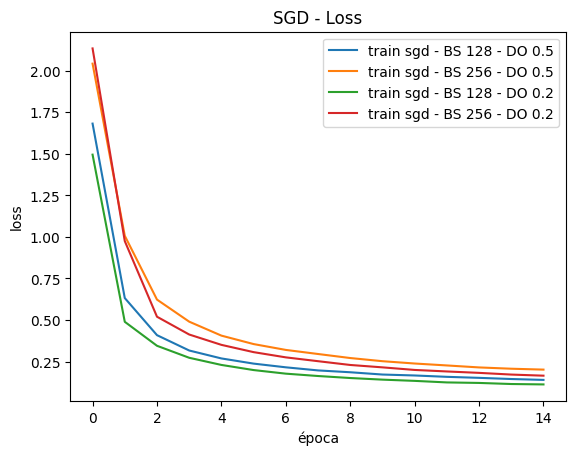

In [ ]:
for i, row in df_results_sgd.iterrows():

  label = f"train {row['Optimizer']} - BS {row['Batch Size']} - DO {row['Drop Out']}"
  plt.plot(row["History"]['loss'], label=label)


plt.title('SGD - Loss')
plt.ylabel('loss')
plt.xlabel('época')
plt.legend();

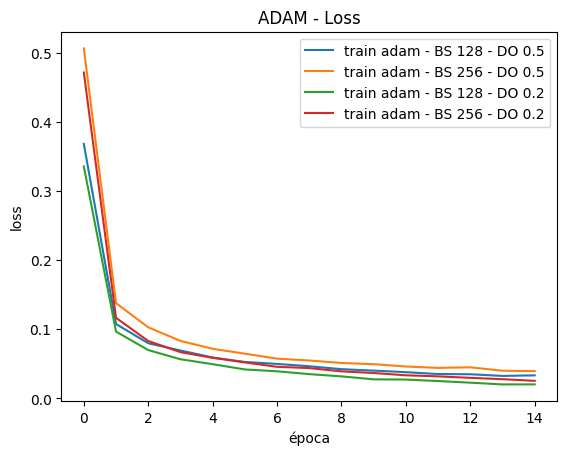

In [ ]:
for i, row in df_results_adam.iterrows():

  label = f"train {row['Optimizer']} - BS {row['Batch Size']} - DO {row['Drop Out']}"
  plt.plot(row["History"]['loss'], label=label)


plt.title('ADAM - Loss')
plt.ylabel('loss')
plt.xlabel('época')
plt.legend();

Analisando a Acurácia para cada um dos Otimizadores

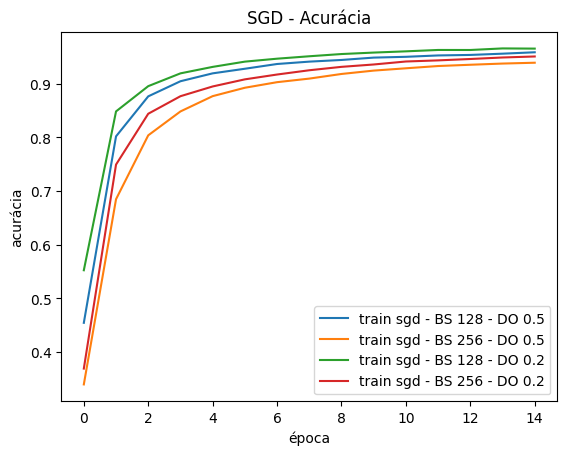

In [ ]:
for i, row in df_results_sgd.iterrows():

  label = f"train {row['Optimizer']} - BS {row['Batch Size']} - DO {row['Drop Out']}"
  plt.plot(row["History"]['accuracy'], label=label)


plt.title('SGD - Acurácia')
plt.ylabel('acurácia')
plt.xlabel('época')
plt.legend();

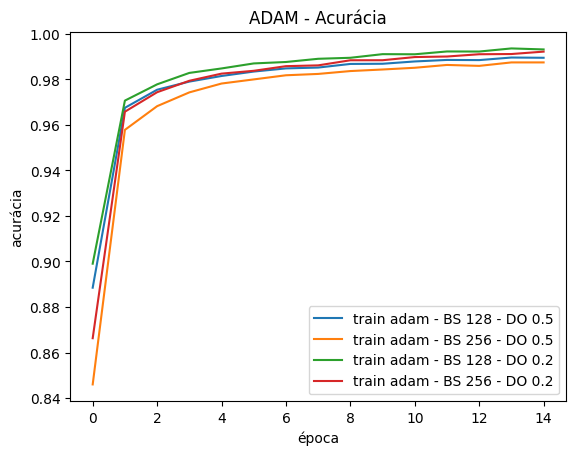

In [ ]:
for i, row in df_results_adam.iterrows():

  label = f"train {row['Optimizer']} - BS {row['Batch Size']} - DO {row['Drop Out']}"
  plt.plot(row["History"]['accuracy'], label=label)


plt.title('ADAM - Acurácia')
plt.ylabel('acurácia')
plt.xlabel('época')
plt.legend();

## Analisando Loss e Acurácia para os treinos com Batch Size 256

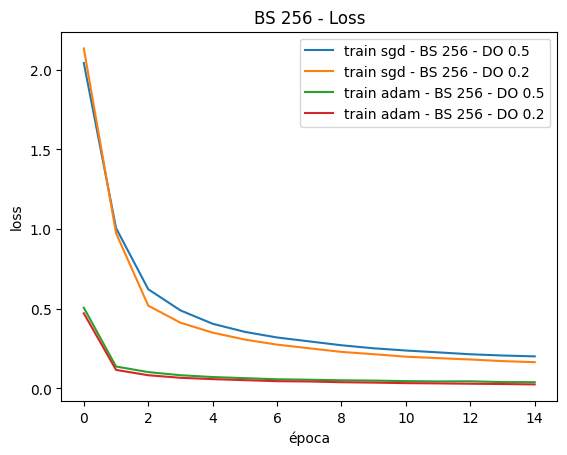

In [ ]:
df_results_BS256 = df_results[df_results['Batch Size'] == 256]

for i, row in df_results_BS256.iterrows():

  label = f"train {row['Optimizer']} - BS {row['Batch Size']} - DO {row['Drop Out']}"
  plt.plot(row["History"]['loss'], label=label)


plt.title('BS 256 - Loss')
plt.ylabel('loss')
plt.xlabel('época')
plt.legend();


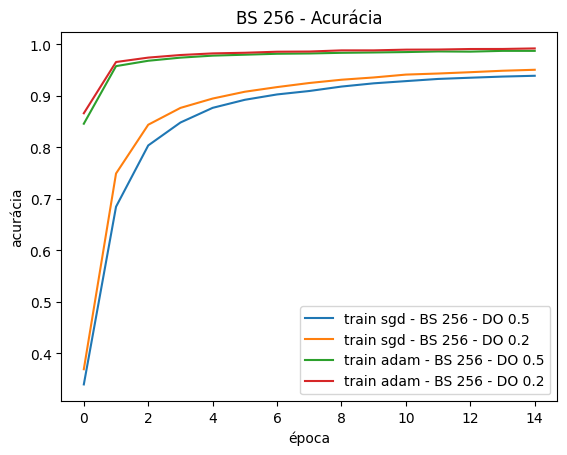

In [ ]:

for i, row in df_results_BS256.iterrows():

  label = f"train {row['Optimizer']} - BS {row['Batch Size']} - DO {row['Drop Out']}"
  plt.plot(row["History"]['accuracy'], label=label)


plt.title('BS 256 - Acurácia')
plt.ylabel('acurácia')
plt.xlabel('época')
plt.legend();

## Analisando Loss e Acurácia para os treinos com Batch Size 128

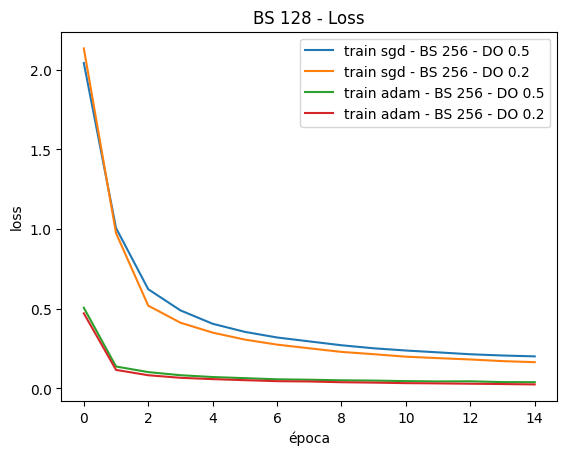

In [ ]:
df_results_BS128 = df_results[df_results['Batch Size'] == 128]

for i, row in df_results_BS256.iterrows():

  label = f"train {row['Optimizer']} - BS {row['Batch Size']} - DO {row['Drop Out']}"
  plt.plot(row["History"]['loss'], label=label)


plt.title('BS 128 - Loss')
plt.ylabel('loss')
plt.xlabel('época')
plt.legend();

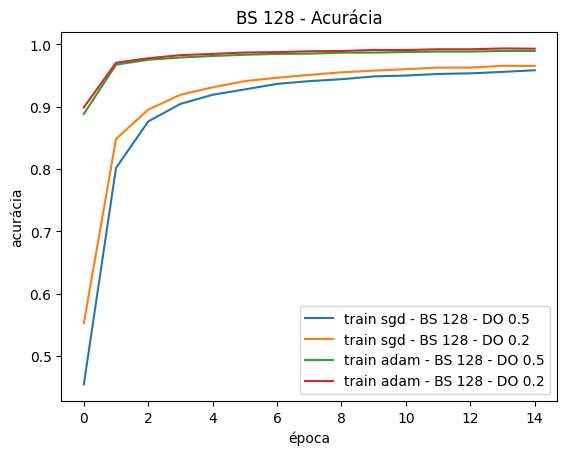

In [ ]:
for i, row in df_results_BS128.iterrows():

  label = f"train {row['Optimizer']} - BS {row['Batch Size']} - DO {row['Drop Out']}"
  plt.plot(row["History"]['accuracy'], label=label)


plt.title('BS 128 - Acurácia')
plt.ylabel('acurácia')
plt.xlabel('época')
plt.legend();

**Refinando as análises**

Como observamos acima, os resultados com o modelo ADAM foram melhores do que dom o modelo SGD.
Vamos então analisar as curvas de LOSS x LOSS de validação para cada um dos experimentos com modelo ADAM

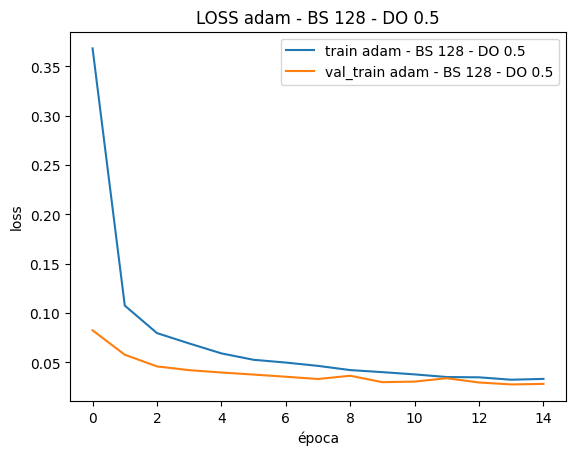

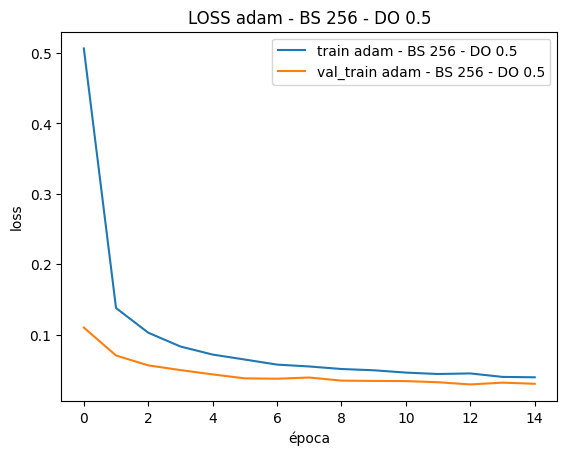

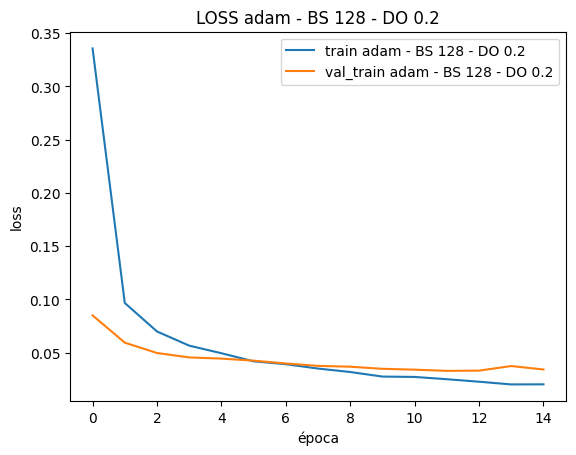

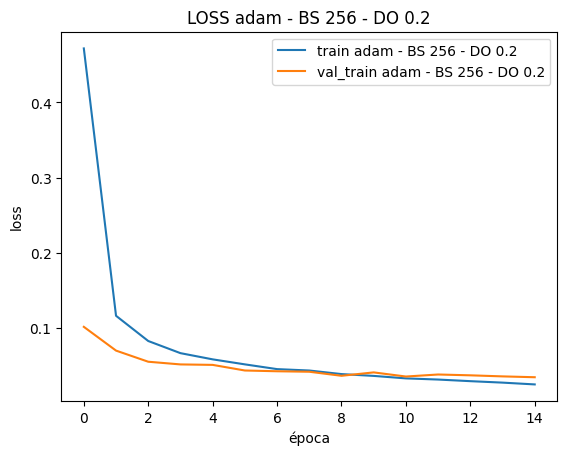

In [ ]:
for i, row in df_results_adam.iterrows():

  label = f"train {row['Optimizer']} - BS {row['Batch Size']} - DO {row['Drop Out']}"
  plt.plot(row["History"]['loss'], label=label)
  label = f"val_train {row['Optimizer']} - BS {row['Batch Size']} - DO {row['Drop Out']}"
  plt.plot(row["History"]['val_loss'], label=label)

  plt.title(f"LOSS {row['Optimizer']} - BS {row['Batch Size']} - DO {row['Drop Out']}")
  plt.ylabel('loss')
  plt.xlabel('época')
  plt.legend();
  plt.show();

Pelos gráficos acima podemos observar que com batch size 128, modelo ADAM, dropout 0.5 esta convergendo melhor.
Vamos verificar o que acontece de aumentarmos a quantidade de épocas desse modelo


In [ ]:
optimizer="adam"
dropout=0.5
batch_size = 128
epochs = 30

model = create_model(optimizer=optimizer, dropout=dropout)

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/30
422/422 [==============================] - 4s 8ms/step - loss: 0.3496 - accuracy: 0.8952 - val_loss: 0.0820 - val_accuracy: 0.9778
Epoch 2/30
422/422 [==============================] - 4s 9ms/step - loss: 0.1113 - accuracy: 0.9660 - val_loss: 0.0600 - val_accuracy: 0.9830
Epoch 3/30
422/422 [==============================] - 3s 8ms/step - loss: 0.0833 - accuracy: 0.9749 - val_loss: 0.0455 - val_accuracy: 0.9870
Epoch 4/30
422/422 [==============================] - 3s 6ms/step - loss: 0.0707 - accuracy: 0.9791 - val_loss: 0.0439 - val_accuracy: 0.9867
Epoch 5/30
422/422 [==============================] - 3s 7ms/step - loss: 0.0625 - accuracy: 0.9804 - val_loss: 0.0362 - val_accuracy: 0.9893
Epoch 6/30
422/422 [==============================] - 4s 9ms/step - loss: 0.0556 - accuracy: 0.9822 - val_loss: 0.0366 - val_accuracy: 0.9892
Epoch 7/30
422/422 [==============================] - 3s 8ms/step - loss: 0.0526 - accuracy: 0.9836 - val_loss: 0.0340 - val_accuracy: 0.9908
Epoch 

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.024136969819664955
Test accuracy: 0.9916999936103821


In [ ]:
new_record = pd.DataFrame([{'Optimizer': optimizer,
                            'Epochs': epochs,
                            'Batch Size': batch_size,
                            'Drop Out': dropout,
                            'Test loss':score[0],
                            'Test accuracy':score[1],
                            'History':history.history}])

df_results = pd.concat([df_results, new_record], ignore_index=True)

In [ ]:
df_results.sort_values(by=['Test accuracy', 'Test loss'], ascending=[False, True])

,Optimizer,Epochs,Batch Size,Drop Out,Test loss,Test accuracy,History
4,adam,15,128,0.5,0.024994,0.9925,"{'loss': [0.36827951669692993, 0.1076199188828..."
8,adam,30,128,0.5,0.024137,0.9917,"{'loss': [0.3496464192867279, 0.11131500452756..."
6,adam,15,128,0.2,0.028847,0.9917,"{'loss': [0.3356110751628876, 0.09665608406066..."
5,adam,15,256,0.5,0.025742,0.9905,"{'loss': [0.5064253211021423, 0.13781923055648..."
7,adam,15,256,0.2,0.027685,0.9901,"{'loss': [0.47157925367355347, 0.1165281310677..."
2,sgd,15,128,0.2,0.079265,0.9761,"{'loss': [1.4949930906295776, 0.48913273215293..."
0,sgd,15,128,0.5,0.085728,0.9741,"{'loss': [1.681801199913025, 0.631978571414947..."
3,sgd,15,256,0.2,0.120131,0.9656,"{'loss': [2.1341707706451416, 0.97481960058212..."
1,sgd,15,256,0.5,0.127892,0.9633,"{'loss': [2.0426106452941895, 1.00683999061584..."


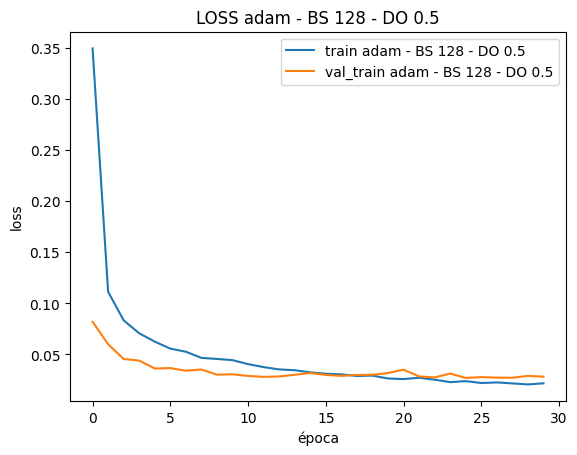

In [ ]:
label = f"train {optimizer} - BS {batch_size} - DO {dropout}"
plt.plot(history.history['loss'], label=label)
label = f"val_train {optimizer} - BS {batch_size} - DO {dropout}"
plt.plot(history.history['val_loss'], label=label)

plt.title(f"LOSS {optimizer} - BS {batch_size} - DO {dropout}")
plt.ylabel('loss')
plt.xlabel('época')
plt.legend();
plt.show();

Como podemos ver no gráfico acima, quando aumentamos o número de épocas para 30, com modelo ADAM, batch size 128, dropout 0.5, a curva de validação não converge na mesma forma que a de treino, o que não é ideal para o treino, pois pode representar overfiting. Nesse caso com Batch size 128 é melhor manter o treino em 15 épocas mesmo.  


Vamos abaixo fazer outro teste, diminuindo o Batch size para 64 e ver o que acontece.  

Modelo ADAM

Batch size = 64

Dropout = 0.5

Epochs = 20





In [ ]:
optimizer="adam"
dropout=0.5
batch_size = 64
epochs = 20

model = create_model(optimizer=optimizer, dropout=dropout)

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/20
844/844 [==============================] - 6s 6ms/step - loss: 0.2836 - accuracy: 0.9118 - val_loss: 0.0651 - val_accuracy: 0.9815
Epoch 2/20
844/844 [==============================] - 6s 7ms/step - loss: 0.0937 - accuracy: 0.9714 - val_loss: 0.0472 - val_accuracy: 0.9883
Epoch 3/20
844/844 [==============================] - 5s 6ms/step - loss: 0.0707 - accuracy: 0.9774 - val_loss: 0.0418 - val_accuracy: 0.9893
Epoch 4/20
844/844 [==============================] - 6s 7ms/step - loss: 0.0602 - accuracy: 0.9818 - val_loss: 0.0348 - val_accuracy: 0.9910
Epoch 5/20
844/844 [==============================] - 5s 6ms/step - loss: 0.0525 - accuracy: 0.9830 - val_loss: 0.0338 - val_accuracy: 0.9903
Epoch 6/20
844/844 [==============================] - 6s 7ms/step - loss: 0.0477 - accuracy: 0.9852 - val_loss: 0.0292 - val_accuracy: 0.9917
Epoch 7/20
844/844 [==============================] - 6s 7ms/step - loss: 0.0433 - accuracy: 0.9861 - val_loss: 0.0311 - val_accuracy: 0.9912
Epoch 

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.02418316714465618
Test accuracy: 0.9919999837875366


In [ ]:
new_record = pd.DataFrame([{'Optimizer': optimizer,
                            'Epochs': epochs,
                            'Batch Size': batch_size,
                            'Drop Out': dropout,
                            'Test loss':score[0],
                            'Test accuracy':score[1],
                            'History':history.history}])

df_results = pd.concat([df_results, new_record], ignore_index=True)

In [ ]:
df_results.sort_values(by=['Test accuracy', 'Test loss'], ascending=[False, True])

,Optimizer,Epochs,Batch Size,Drop Out,Test loss,Test accuracy,History
4,adam,15,128,0.5,0.024994,0.9925,"{'loss': [0.36827951669692993, 0.1076199188828..."
9,adam,20,64,0.5,0.024183,0.9920,"{'loss': [0.28362002968788147, 0.0936791524291..."
8,adam,30,128,0.5,0.024137,0.9917,"{'loss': [0.3496464192867279, 0.11131500452756..."
6,adam,15,128,0.2,0.028847,0.9917,"{'loss': [0.3356110751628876, 0.09665608406066..."
5,adam,15,256,0.5,0.025742,0.9905,"{'loss': [0.5064253211021423, 0.13781923055648..."
7,adam,15,256,0.2,0.027685,0.9901,"{'loss': [0.47157925367355347, 0.1165281310677..."
2,sgd,15,128,0.2,0.079265,0.9761,"{'loss': [1.4949930906295776, 0.48913273215293..."
0,sgd,15,128,0.5,0.085728,0.9741,"{'loss': [1.681801199913025, 0.631978571414947..."
3,sgd,15,256,0.2,0.120131,0.9656,"{'loss': [2.1341707706451416, 0.97481960058212..."
1,sgd,15,256,0.5,0.127892,0.9633,"{'loss': [2.0426106452941895, 1.00683999061584..."


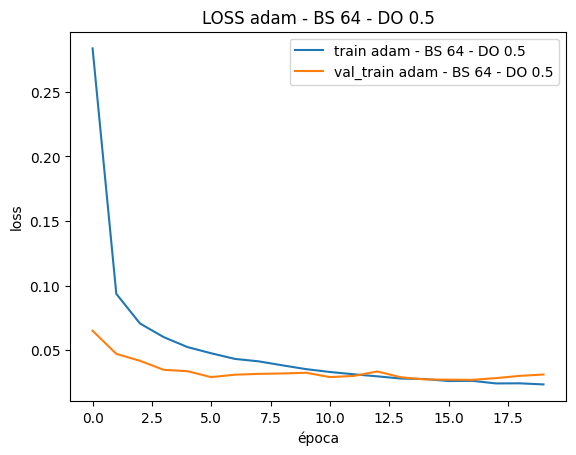

In [ ]:
label = f"train {optimizer} - BS {batch_size} - DO {dropout}"
plt.plot(history.history['loss'], label=label)
label = f"val_train {optimizer} - BS {batch_size} - DO {dropout}"
plt.plot(history.history['val_loss'], label=label)

plt.title(f"LOSS {optimizer} - BS {batch_size} - DO {dropout}")
plt.ylabel('loss')
plt.xlabel('época')
plt.legend();
plt.show();

In [ ]:
optimizer="adam"
dropout=0.5
batch_size = 64
epochs = 15

model = create_model(optimizer=optimizer, dropout=dropout)

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
844/844 [==============================] - 6s 6ms/step - loss: 0.2849 - accuracy: 0.9120 - val_loss: 0.0808 - val_accuracy: 0.9767
Epoch 2/15
844/844 [==============================] - 6s 7ms/step - loss: 0.1001 - accuracy: 0.9693 - val_loss: 0.0486 - val_accuracy: 0.9878
Epoch 3/15
844/844 [==============================] - 6s 7ms/step - loss: 0.0739 - accuracy: 0.9765 - val_loss: 0.0415 - val_accuracy: 0.9875
Epoch 4/15
844/844 [==============================] - 7s 9ms/step - loss: 0.0622 - accuracy: 0.9807 - val_loss: 0.0370 - val_accuracy: 0.9913
Epoch 5/15
844/844 [==============================] - 5s 6ms/step - loss: 0.0538 - accuracy: 0.9825 - val_loss: 0.0355 - val_accuracy: 0.9900
Epoch 6/15
844/844 [==============================] - 5s 6ms/step - loss: 0.0472 - accuracy: 0.9848 - val_loss: 0.0375 - val_accuracy: 0.9902
Epoch 7/15
844/844 [==============================] - 6s 7ms/step - loss: 0.0446 - accuracy: 0.9853 - val_loss: 0.0305 - val_accuracy: 0.9917
Epoch 

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.023586515337228775
Test accuracy: 0.9919999837875366


In [ ]:
new_record = pd.DataFrame([{'Optimizer': optimizer,
                            'Epochs': epochs,
                            'Batch Size': batch_size,
                            'Drop Out': dropout,
                            'Test loss':score[0],
                            'Test accuracy':score[1],
                            'History':history.history}])

df_results = pd.concat([df_results, new_record], ignore_index=True)

In [ ]:
df_results.sort_values(by=['Test accuracy', 'Test loss'], ascending=[False, True])

,Optimizer,Epochs,Batch Size,Drop Out,Test loss,Test accuracy,History
4,adam,15,128,0.5,0.024994,0.9925,"{'loss': [0.36827951669692993, 0.1076199188828..."
10,adam,15,64,0.5,0.023587,0.9920,"{'loss': [0.2848784029483795, 0.10005272179841..."
9,adam,20,64,0.5,0.024183,0.9920,"{'loss': [0.28362002968788147, 0.0936791524291..."
8,adam,30,128,0.5,0.024137,0.9917,"{'loss': [0.3496464192867279, 0.11131500452756..."
6,adam,15,128,0.2,0.028847,0.9917,"{'loss': [0.3356110751628876, 0.09665608406066..."
5,adam,15,256,0.5,0.025742,0.9905,"{'loss': [0.5064253211021423, 0.13781923055648..."
7,adam,15,256,0.2,0.027685,0.9901,"{'loss': [0.47157925367355347, 0.1165281310677..."
2,sgd,15,128,0.2,0.079265,0.9761,"{'loss': [1.4949930906295776, 0.48913273215293..."
0,sgd,15,128,0.5,0.085728,0.9741,"{'loss': [1.681801199913025, 0.631978571414947..."
3,sgd,15,256,0.2,0.120131,0.9656,"{'loss': [2.1341707706451416, 0.97481960058212..."


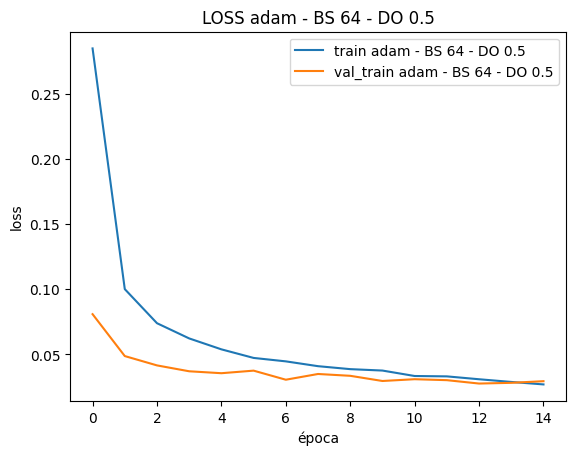

In [ ]:
label = f"train {optimizer} - BS {batch_size} - DO {dropout}"
plt.plot(history.history['loss'], label=label)
label = f"val_train {optimizer} - BS {batch_size} - DO {dropout}"
plt.plot(history.history['val_loss'], label=label)

plt.title(f"LOSS {optimizer} - BS {batch_size} - DO {dropout}")
plt.ylabel('loss')
plt.xlabel('época')
plt.legend();
plt.show();

# **Conclusão**

Através dos experimentos foi possível obvervar que a utilização do otimizador ADAM no treinamento da rede, claramente,  obteve um melhor desempenho em relação do otimizador SGD, os dados convergiram em poucas épocas e com melhores valores de Acurácia e Loss.

Para ambos otimizadores, os resultados parecem ser melhores quando utilizamos Batchs menores.

A modificação do Drop Out para 0.2 nesses experimentos não mostrou melhora significativa


Sendo assim a proposta de configuração da rede conforme os experimentos realizados fica sendo:

**Optimizer : ADAM**

**Batch Size: 128**

**Drop out: 0.5**

**Epochs: 15**

